<font ><b><h1 style="font-size:3em; font-family:sans-serif"><center>Solving the Mean-Field Galactic Dynamo Equation along the z-axis</center></h1></b>

# PART 1

## Theory
### The Mean-Field Induction Equation
The mean field induction equation is given by:
     $$\frac{\partial \bar{B}}{\partial t}=\nabla \times (\bar{V}\times\bar{B}+\epsilon -\eta\nabla\times\bar{B})$$

Taking the first order smoothing approximation we can write $\epsilon=\alpha\bar{B}-\eta_t\nabla\times\bar{B}$
$$\frac{\partial \bar{B}}{\partial t}=\nabla \times (\bar{V}\times\bar{B}+\alpha\bar{B} -(\eta_t+\eta)\nabla\times\bar{B})$$
If we ignore the magnetic induction term and the alpha term diffusion equation can be writen as:
    $$\frac{\partial \bar{B}}{\partial t}=-\nabla \times \beta\nabla \times \bar{B}$$
where $\beta=\eta_t+\eta$.
If we assume beta to be independent of position we can write:
    $$\beta\nabla \times \nabla \times \bar{B}=\beta\left[\nabla(\nabla\cdot \bar{B})-\nabla^2 \bar{B}\right]$$
Using the solenoidality condition $\nabla\cdot B=0$ we get
 $$\frac{\partial \bar{B}}{\partial t}=\beta\nabla^2 \bar{B}$$
Writing the above equation componenet wise in cylindrical coordinates we get:
$$ \frac{\partial \bar{B}_r}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_r\right)-\frac{2}{r^2}\frac{\partial \bar{B}_\phi}{\partial \phi}+\beta \frac{\partial^2 \bar{B}_r}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_r\right)\right],$$
$$ \frac{\partial \bar{B}_\phi}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_\phi\right)+\frac{2}{r^2}\frac{\partial \bar{B}_\phi}{\partial \phi}+\beta \frac{\partial^2 \bar{B}_\phi}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_\phi\right)\right],$$
$$\frac{\partial \bar{B}_z}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_z\right)+\beta \frac{\partial^2 \bar{B}_z}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_z\right)\right],$$
Assuming $\bar{B}$ to be axisymmetric all terms with $\frac{\partial}{\partial\phi}$ are zero<br>
Given my project was to solve for variation of B along z I will also be neglecting all $\frac{\partial}{\partial r}$ which gives us the following three equations
$$\frac{\partial \bar{B}_r}{\partial t}=\beta\frac{\partial^2 \bar{B}_r}{\partial z^2},\qquad \frac{\partial \bar{B}_\phi}{\partial t}=\beta\frac{\partial^2 \bar{B}_\phi}{\partial z^2},\qquad \frac{\partial \bar{B}_z}{\partial t}=\beta\frac{\partial^2 \bar{B}_z}{\partial z^2}$$
The magnetic diffusion coefficient $\beta$ is given by,
$$\beta\approx \frac{1}{3}\tau v_{rms}^2$$
where typical values of faraday time and velocity for a galaxy are $\tau\approx 10Myr$ $v_{rms}\approx 10^{4}km/s$ respectively which when substituted in the above equation gives a typical value for $\beta=34 pc^2/Myr$
### Total Magnetic field magnitude and pitch angle
Let's define $\bar{B}_{total}=\sqrt{\bar{B}_r^2+\bar{B}_\phi^2}$ we would be finding the variation of $\bar{B}_{total}$ with time
<br>We will also define pitch angle which is defined as $P_b=tan^{-1}\left(\frac{\bar{B}_r}{\bar{B}_\phi}\right)$
### Magnetic decay constant
The total magnetic field can be represented by the following equation
$$\bar{B}_{total}(z,t)=\bar{B}(z)exp(\gamma t)$$
where $\bar{B}(z)$ represents all the variation of magnetic field spatially and $\gamma$ represents the magnetic decay constant which we will be calculating
### Numerical integration
To numerically solve this equation I will be using the Crank Nickolson method which is a combination of explicit and implicit meathods with which has the advantage of being unconditionally stable with with an error of $\mathcal{O}(k^2)+\mathcal{O}(h^2)$ where k and h are the time step and spatial step size respectively.<br>
Crank–Nicolson Method uses the average of both previous and present time-step to numerically solve the problem. The discretized form of the equation is as follows.
$$ \frac{B^{j+1}_{i} - B^{j}_{i}}{dt} = \dfrac{\beta}{2} \: \left( \dfrac{B^{j+1}_{i+1} - 2B^{j+1}_{i} + B^{j+1}_{i-1}}{dz^2} \right) + \dfrac{\beta}{2} \: \left( \dfrac{B^{j}_{i+1} - 2B^{j}_{i} + B^{j}_{i-1}}{dz^2} \right) $$

where present time-step is represented by $(j+1)$ and the past time-step $(j)$ and $(i)$ denoted the spatial index of a particular grid point. Rearranging we get
$$ B^{j+1}_{i} - \dfrac{\beta \: dt}{2 \: dz^2} \: \left( B^{j+1}_{i+1} - 2B^{j+1}_{i} + B^{j+1}_{i-1} \right) = B^{j}_{i} + \dfrac{\beta \: dt}{2 \: dz^2} \: \left( B^{j}_{i+1} - 2B^{j}_{i} + B^{j}_{i-1} \right) $$
The above equation can be written in matrix form to be,
$$ PB^{j+1} = QB^{j} $$
where $P$ and $Q$ are matrices of the form,
$$ P=\left[\begin{array}{ccccc}1+2 \sigma & -\sigma & 0 & \cdots & 0 \\ -\sigma & 1+2 \sigma & -\sigma & \ddots & \vdots \\ 0 & -\sigma & 1+2 \sigma & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\sigma \\ 0 & \cdots & 0 & -\sigma & 1+2 \sigma\end{array}\right]     \qquad \qquad      Q=\left[\begin{array}{ccccc}1-2 \sigma & \sigma & 0 & \cdots & 0 \\ \sigma & 1-2 \sigma & \sigma & \ddots & \vdots \\ 0 & \sigma & 1-2 \sigma & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \sigma \\ 0 & \cdots & 0 & \sigma & 1-2 \sigma\end{array}\right] $$ 
where $\sigma=\dfrac{\beta \: dt}{2 \: dz^2}$
<br><br>
$B^{j+1}$ can be obtained by multiplying the matrix equation throughout with $M^{-1}$ with resulting equation being
$$B^{j+1} = P^{-1}QB^{j} $$

The simulation grid is taken to be from -150 pc to 150 pc resembling the thickness of milky way galaxy disk which is around 1000 light years or 300pc with step size $dz=0.1$
<img src="https://thescientificodyssey.typepad.com/.a/6a01b8d0788cce970c01b8d29d8bf6970c-pi"><br>
Image source: [https://thescientificodyssey.typepad.com/my-blog/2017/08/episode-339-harlow-shapley-and-finding-our-place-in-the-galaxy.html]
The temporal grid range is taken according to the seed field magnitude such that there are 100 steps within the temporal range

## Code

Importing Packages

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib widget
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
fig_s=800

### Defining Functions

Defining the Crank Nicolson Function

In [2]:
def crank_nicolson(u0, dx, dt, T,D):
    """
    u0: initial condition, a function of x
    dx: space step size
    dt: time step size
    T: total time upto which integration is to be done
    """
    N = int(T/dt)
    J = len(u0)
    u = np.empty((N+1, J))
    u[0] = u0
    sigma = D*dt / (dx**2)

    # Construct the tridiagonal matrices
    P=np.diag(2+2*sigma*np.ones(J))+np.diag(-sigma* np.ones(J-1), -1)+np.diag(-sigma* np.ones(J-1), 1)
    Q=np.diag(2-2*sigma*np.ones(J))+np.diag(sigma* np.ones(J-1), -1)+np.diag(sigma* np.ones(J-1), 1)
    # Iterating for each time step
    for n in range(N):
        b = u[n]
        # print(n)
        u[n+1] =  np.linalg.solve(P, np.dot(Q, b))
        u[n+1, 0] = u[n, 0]
        u[n+1, -1] = u[n, -1]
    return u

Calculating pitch angle

In [6]:
def b_total_pitch(B_r,B_phi):
    return np.sqrt(B_r**2+B_phi**2), np.where(B_phi!=0, np.arctan(B_r/B_phi)*180/np.pi, np.sign(B_r)*90)

Calculating decay factor gamma

In [4]:
def decay_factor(B_t,t):
    log_B_t=np.log(B_t)
    # Plot log_B_t vs t

    fig2=plt.figure()
    plt.plot(t, log_B_t, label='log_B_t')

    # Fit a line to the last 100 data points
    slope, intercept, _, _, _ = linregress(t[-10:], log_B_t[-10:])
    fitted_line = slope * t[-10:] + intercept

    # Plot the fitted line
    plt.plot(t[-10:], fitted_line, label='Fitted Line')

    # Set labels and title
    plt.xlabel('t')
    plt.ylabel(r'$log(B_{total})$')
    plt.title(r'Plot of $log(B_{total})$ vs t')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

    return slope

### Applying specific Boundary Conditions

### 1) $B_{0r}=\frac{3z}{z_{max}}+sin\left(\frac{3z}{z_{max}}\right)e^{-(\frac{3z}{z_{max}})^2}$
### $\;\;\,$ $B_{0\phi}=sin\left(\frac{\pi z}{z_{max}}\right)$

Boundary conditions resolution and other parameters

In [5]:
#Spatial resolution and spatial domain
z_min = -150 #pc
z_max = 150 #pc
dz = 1 #pc
#Array of all spatial points
z = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=100 #Myr
dt=1 #Myr

t = np.arange(0, t_f, dt)
#Initial condition
B0_R=((3*z/z_max) + np.sin(3*z/z_max)) * np.exp(-(3*z/z_max)**2.0)
B0_PHI=np.sin(np.pi*(z/z_max))
#Diffusion parameter
D=34

Plotting seed magnetic field

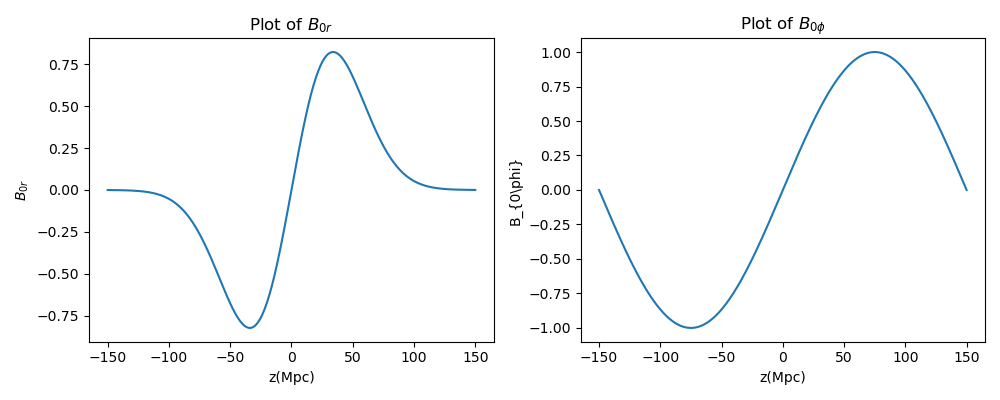

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[10, 4])

# Plot of B0_R
axs[0].plot(z, B0_R)
axs[0].set_xlabel('z(Mpc)')
axs[0].set_ylabel(r'$B_{0r}$')
axs[0].set_title(r'Plot of $B_{0r}$')

# Plot of B0_PHI
axs[1].plot(z, B0_PHI)
axs[1].set_xlabel('z(Mpc)')
axs[1].set_ylabel(r'B_{0\phi}')
axs[1].set_title(r'Plot of $B_{0\phi}$')

plt.tight_layout()
plt.show()

Plotting B in 3d

In [7]:
#No of points where vectors have to be shown in R,Phi,z
pl_res=(4,10,20)

# Assuming B_total and pitch_angles are your arrays
B_total,pitch_angles=b_total_pitch(B0_R,B0_PHI) # random pitch angles between 0 and pi/2


B_3d_phi = np.tile(B0_PHI[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_r = np.tile(B0_R[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_z = np.zeros_like(B_3d_r)
B_3d_total= np.tile(B_total, (pl_res[0], pl_res[1], 1))
# Define the grid in r, phi, z
r = np.linspace(0, 1000, B_3d_r.shape[0])
phi = np.linspace(0, 2*np.pi, B_3d_phi.shape[1])
z = np.linspace(0, 300, B_3d_z.shape[2])
r, phi, z = np.meshgrid(r, phi, z, indexing='ij')

# Convert to Cartesian coordinates
x = r * np.cos(phi)
y = r * np.sin(phi)

# Convert B_3d_r, B_3d_phi to Cartesian components
B_3d_x = B_3d_r * np.cos(phi) - B_3d_phi * np.sin(phi)
B_3d_y = B_3d_r * np.sin(phi) + B_3d_phi * np.cos(phi)

# Create 3D plot
# Compute magnitudes for scaling
B_magnitude = np.max(np.sqrt(B_3d_x ** 2 + B_3d_y ** 2 + B_3d_z ** 2))

# Scale components by magnitude for variable lengths
scale_factor = 100  # Adjust this factor for desired length scaling

B_3d_x_scaled = B_3d_x / B_magnitude * scale_factor
B_3d_y_scaled = B_3d_y / B_magnitude * scale_factor
B_3d_z_scaled = B_3d_z / B_magnitude * scale_factor

fig = go.Figure()

# Add an arrow trace for each point
fig = go.Figure(data=go.Cone(x=x.ravel(), y=y.ravel(), z=z.ravel(),
                             u=B_3d_x_scaled.ravel(), v=B_3d_y_scaled.ravel(), w=B_3d_z_scaled.ravel(),
                             sizemode="scaled", sizeref=1))

# Set labels
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'),
    width=fig_s,
    height=fig_s)

fig.show()

Plotting variation of $B_{r}$ with time

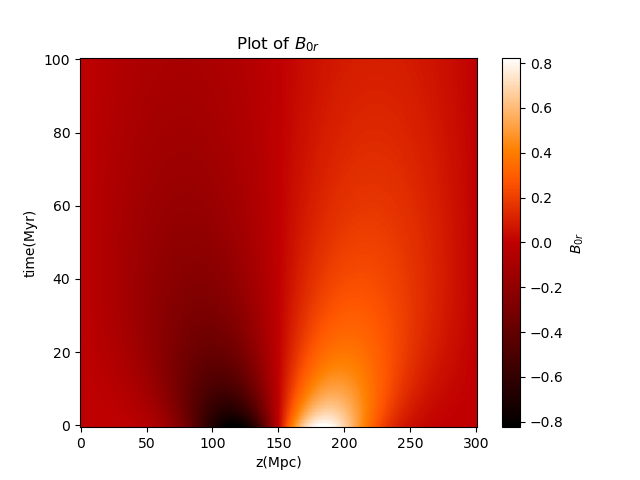

In [8]:
B_R = crank_nicolson(B0_R, dz, dt, t_f,D)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$B_{r}$')
plt.xlabel('z(Mpc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $B_{r}$')
plt.show()


Plotting variation of $B_{\phi}$ with time

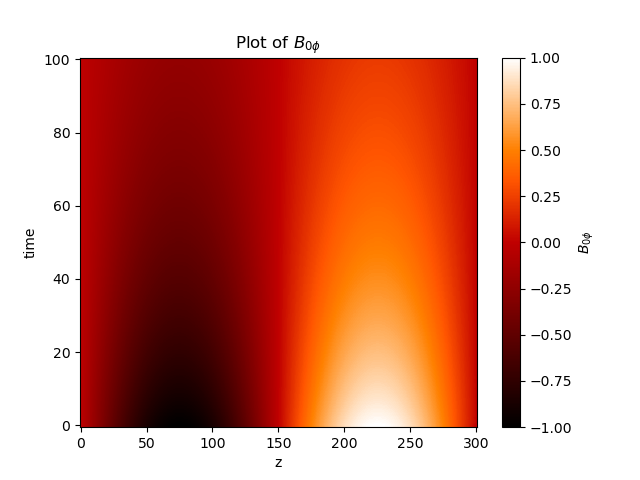

In [9]:
B_PHI = crank_nicolson(B0_PHI, dz, dt, t_f,D)
fig1=plt.figure()
plt.imshow(B_PHI, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$B_{\phi}$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $B_{\phi}$')
plt.show()

Calculating the decay rate $\gamma$ and $B_{total}$

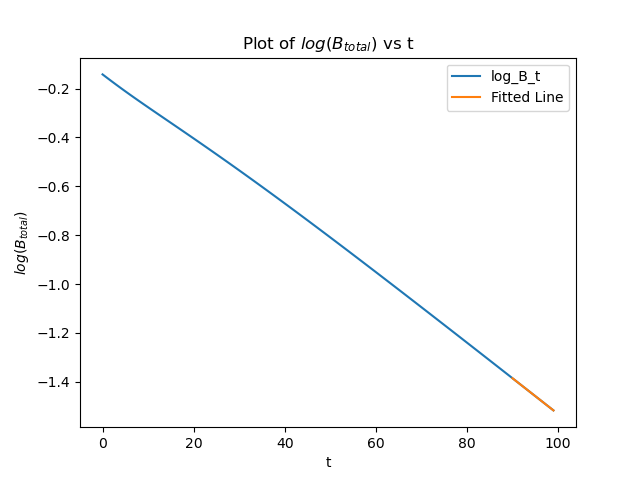

Decay factor gamma for B  0.014627814707104753


In [10]:
B_total,p_b=b_total_pitch(B_R,B_PHI)
gamma=decay_factor(B_total[:,50][:-1],t)
# Show the plot
# plt.show()
print("Decay factor gamma for B ",-gamma)

Ploting variation of $B_{total}$ with time

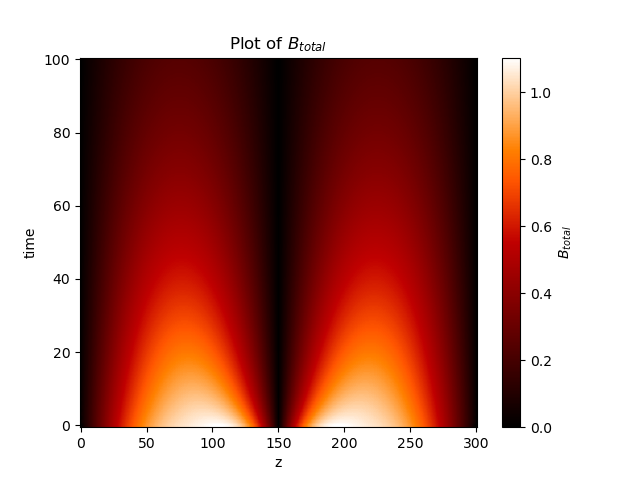

In [11]:
fig1=plt.figure()
plt.imshow(B_total, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$B_{total}$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $B_{total}$')
plt.show()

Plotting pitch angle $P_b$ versus time

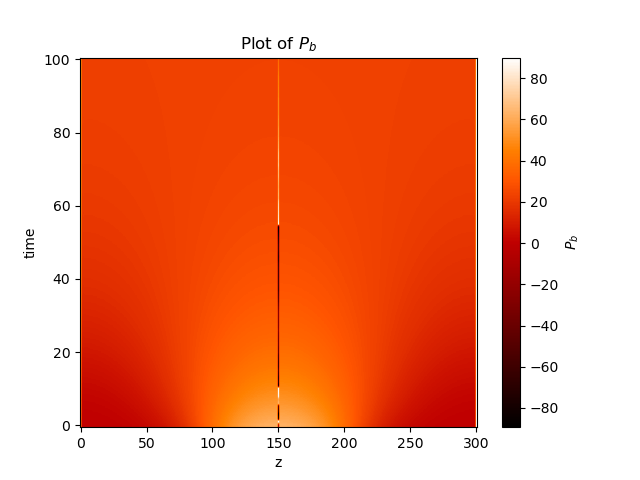

In [12]:
fig1=plt.figure()
plt.imshow(p_b, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$P_b$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $P_b$')
plt.show()

### 2) $B_{0r}=\frac{3z}{z_{max}}+1+sin\left(\frac{3z}{z_{max}}+1\right)e^{-(\frac{3z}{z_{max}}+1)^2}$
### $\;\;\,$ $B_{0\phi}=sin\left(\frac{0.5\pi z}{z_{max}}\right)$

Boundary conditions resolution and other parameters

In [13]:
#Spatial resolution and spatial domain
z_min = -150 #pc
z_max = 150 #pc
dz = 1 #pc
#Array of all spatial points
z = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=100 #Myr
dt=1 #Myr

t = np.arange(0, t_f, dt)
#Initial condition
B0_R=((3*((z/z_max)+1)) + np.sin(3*((z/z_max)+1))) * np.exp(-(3*((z/z_max)+1))**2.0)
B0_PHI=np.sin(np.pi*((0.5*(z+z_max)/(z_max))))
#Diffusion parameter
D=34

Plotting seed magnetic field

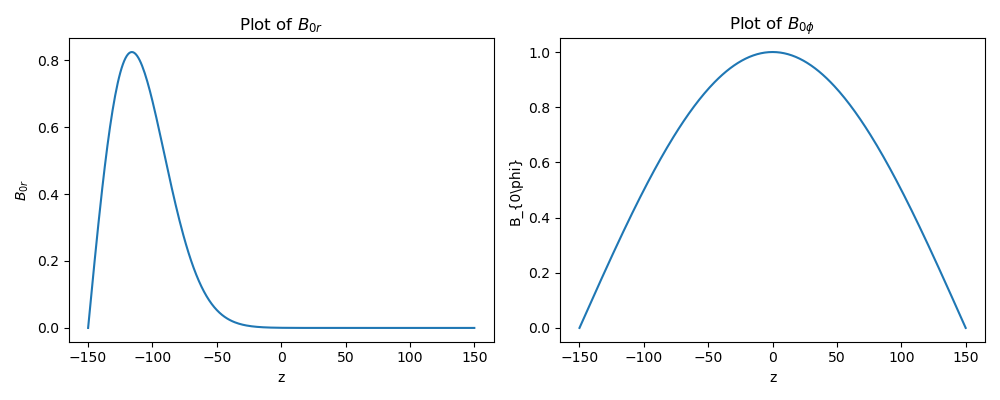

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot of B0_R
axs[0].plot(z, B0_R)
axs[0].set_xlabel('z')
axs[0].set_ylabel(r'$B_{0r}$')
axs[0].set_title(r'Plot of $B_{0r}$')

# Plot of B0_PHI
axs[1].plot(z, B0_PHI)
axs[1].set_xlabel('z')
axs[1].set_ylabel(r'B_{0\phi}')
axs[1].set_title(r'Plot of $B_{0\phi}$')

plt.tight_layout()
plt.show()

Plotting B in 3d

In [15]:
#No of points where vectors have to be shown in R,Phi,z
pl_res=(4,10,20)

# Assuming B_total and pitch_angles are your arrays
B_total,pitch_angles=b_total_pitch(B0_R,B0_PHI) # random pitch angles between 0 and pi/2


B_3d_phi = np.tile(B0_PHI[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_r = np.tile(B0_R[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_z = np.zeros_like(B_3d_r)
B_3d_total= np.tile(B_total, (pl_res[0], pl_res[1], 1))
# Define the grid in r, phi, z
r = np.linspace(0, 1000, B_3d_r.shape[0])
phi = np.linspace(0, 2*np.pi, B_3d_phi.shape[1])
z = np.linspace(0, 300, B_3d_z.shape[2])
r, phi, z = np.meshgrid(r, phi, z, indexing='ij')

# Convert to Cartesian coordinates
x = r * np.cos(phi)
y = r * np.sin(phi)

# Convert B_3d_r, B_3d_phi to Cartesian components
B_3d_x = B_3d_r * np.cos(phi) - B_3d_phi * np.sin(phi)
B_3d_y = B_3d_r * np.sin(phi) + B_3d_phi * np.cos(phi)

# Create 3D plot
# Compute magnitudes for scaling
B_magnitude = np.max(np.sqrt(B_3d_x ** 2 + B_3d_y ** 2 + B_3d_z ** 2))

# Scale components by magnitude for variable lengths
scale_factor = 100  # Adjust this factor for desired length scaling

B_3d_x_scaled = B_3d_x / B_magnitude * scale_factor
B_3d_y_scaled = B_3d_y / B_magnitude * scale_factor
B_3d_z_scaled = B_3d_z / B_magnitude * scale_factor

fig = go.Figure()

# Add an arrow trace for each point
fig = go.Figure(data=go.Cone(x=x.ravel(), y=y.ravel(), z=z.ravel(),
                             u=B_3d_x_scaled.ravel(), v=B_3d_y_scaled.ravel(), w=B_3d_z_scaled.ravel(),
                             sizemode="scaled", sizeref=1))

# Set labels
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'),
    width=fig_s,
    height=fig_s)

fig.show()

Plotting variation of $B_{r}$ with time

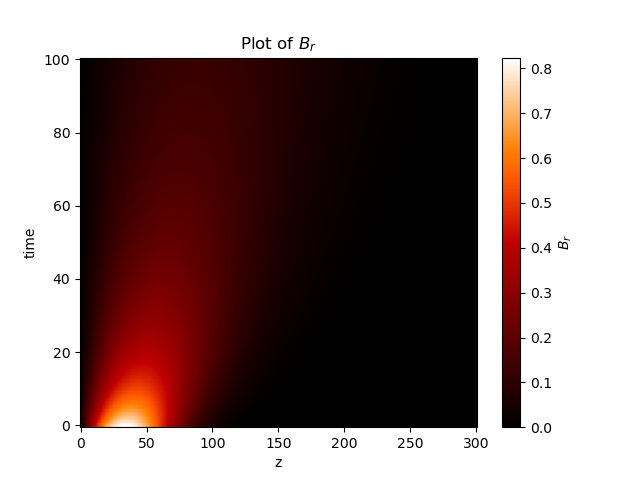

In [16]:
B_R = crank_nicolson(B0_R, dz, dt, t_f,D)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$B_{r}$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $B_{r}$')
plt.show()


Plotting variation of $B_{\phi}$ with time

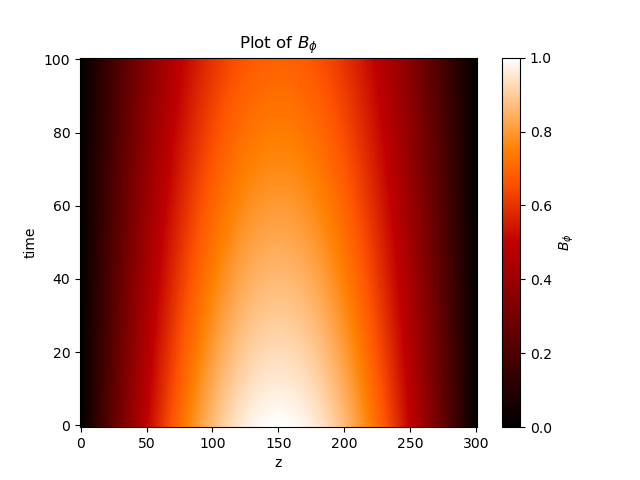

In [17]:
B_PHI = crank_nicolson(B0_PHI, dz, dt, t_f,D)
fig1=plt.figure()
plt.imshow(B_PHI, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$B_{\phi}$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $B_{\phi}$')
plt.show()

Calculating the decay rate $\gamma$ and $B_{total}$

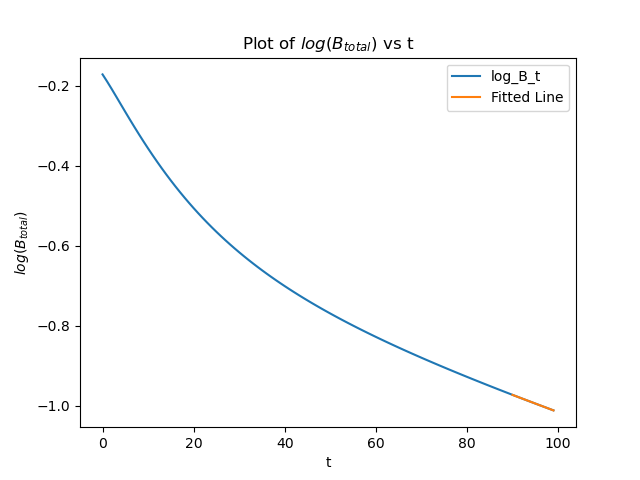

Decay factor gamma for B  0.004312190955855517


In [18]:
B_total,p_b=b_total_pitch(B_R,B_PHI)
gamma=decay_factor(B_total[:,50][:-1],t)
# Show the plot
# plt.show()
print("Decay factor gamma for B ",-gamma)

Ploting variation of $B_{total}$ with time

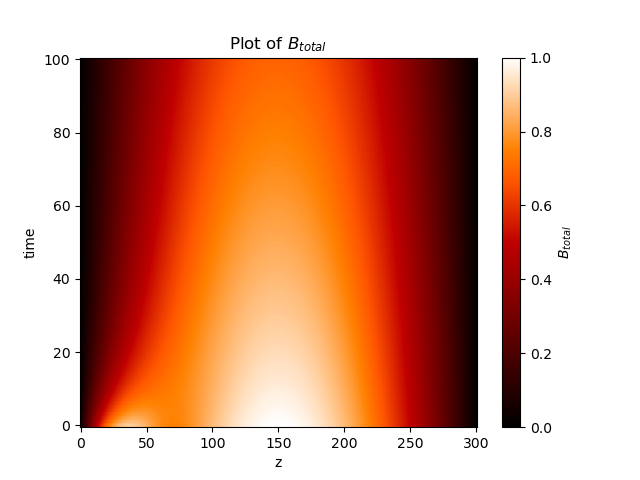

In [19]:
fig1=plt.figure()
plt.imshow(B_total, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$B_{total}$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $B_{total}$')
plt.show()

Plotting pitch angle $P_b$ versus time

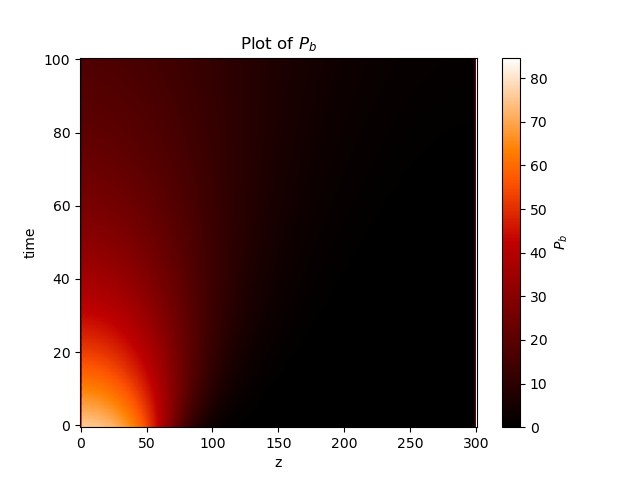

In [20]:
fig1=plt.figure()
plt.imshow(p_b, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$P_b$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $P_{b}$')
plt.show()

# PART 2

## Theory
### The Mean-Field Induction Equation
Like in the previous section we start with the mean-field equation
$$\frac{\partial \bar{B}}{\partial t}=\nabla \times (\bar{V}\times\bar{B}+\alpha\bar{B} -\beta\nabla\times\bar{B})$$

If we assume $\beta$ to be independent of position and using solenoidality condition $\nabla\cdot B=0$ as shown in part 1 we can simplify the equation to:
$$\dfrac{\partial \bar{B}}{\partial t} = \nabla \times \left( \bar{V} \times \bar{B} \right) + \nabla \times \left(\alpha \bar{B} \right) - \beta \left( \nabla \times \nabla \times \bar{B} \right) $$
$\bar{V}$ can be written in terms of its components in cylindrical coordinates as
$$\bar{V}=\bar{V}_r(r)\hat{r}+r\Omega(r)\hat{\phi}+\bar{V}_z(z)\hat{z}$$
Substituting for $\bar{V}$ in the mean-field equation and solving for each component in cylindrical coordinates taking azimuthal symmetry we get

$$ \frac{\partial \bar{B}_r}{\partial t} = V_r \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \beta \left[ \frac{\partial^2 \bar{B}_r}{\partial z^2} + \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_r \right) \right) \right] $$

$$ \frac{\partial \bar{B}_\phi}{\partial t} = r \Omega \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_\phi)}{\partial z} - \frac{\partial (V_r \bar{B}_\phi)}{\partial r} + \frac{\partial (r \Omega \bar{B}_r)}{\partial r} + \frac{\partial (\alpha \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_z)}{\partial r} + \beta \left[ \frac{\partial^2 \bar{B}_\phi}{\partial z^2} + \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_\phi \right) \right) \right] $$
Using the $\alpha\Omega$ approximation and inserting $q=-\frac{r}{\Omega}\frac{\partial\Omega}{\partial r}$ we obtain
$$ \frac{\partial \bar{B}_r}{\partial t} = - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \beta \frac{\partial^2 \bar{B}_r}{\partial z^2} $$
$$ \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \beta \frac{\partial^2 \bar{B}_\phi}{\partial z^2} $$
The function $\Omega(r)$ is taken as,
$$\Omega=\frac{\Omega_0}{\sqrt{1+\left(\frac{r}{r_0}\right)^2}}$$
### Dynamo number
Dynamo number is defined as,
$$ D = − \frac{\alpha_0 q \Omega h^3}{\eta_t^2} $$
where h is the thickness of the disk which is measured along the z-axis
### Numerical Integration
Discretized form of the equations are
$$ \frac{\bar{B}^{\:\: j+1}_{r\:i} - \bar{B}^{\:\: j}_{r\:i}}{dt} = -\dfrac{\alpha}{2} \: \left( \frac{\bar{B}^{\:\:\: j+1}_{\phi\:i+1} - \bar{B}^{\:\:\: j+1}_{\phi\:i}}{dz} + \frac{\bar{B}^{\:\:\: j}_{\phi\:i+1} - \bar{B}^{\:\:\: j}_{\phi\:i}}{dz} \right)+\dfrac{\beta}{2} \: \left( \dfrac{\bar{B}^{\:\: j+1}_{r\:i+1} - 2\bar{B}^{\:\: j+1}_{r\:i} + \bar{B}^{\:\: j+1}_{r\:i-1}}{dz^2} + \dfrac{\bar{B}^{\:\: j}_{r\:i+1} - 2\bar{B}^{\:\: j}_{r\:i} + \bar{B}^{\:\: j}_{r\:i-1}}{dz^2} \right) $$
$$ \frac{\bar{B}^{\:\:\: j+1}_{\phi\:i} - \bar{B}^{\:\:\: j}_{\phi\:i}}{dt} = -q\Omega \bar{B}^{\:\: j+1}_{r\:i} + \dfrac{\eta_T}{2} \: \left( \dfrac{\bar{B}^{\:\:\: j+1}_{\phi\:i+1} - 2\bar{B}^{\:\:\: j+1}_{\phi\:i} + \bar{B}^{\:\:\: j+1}_{\phi\:i-1}}{dz^2} + \dfrac{\bar{B}^{\:\:\: j}_{\phi\:i+1} - 2\bar{B}^{\:\:\: j}_{\phi\:i} + \bar{B}^{\:\:\: j}_{\phi\:i-1}}{dz^2} \right) $$


## Code

Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

### Defining Functions

Defining the Crank Nicolson Function for special case

In [2]:
def mod_crank_nicolson(B0_r, dx, dt, T,D,alpha,Omega,q,B0_phi=None):
    """
    u0: initial condition, a function of x
    dx: space step size
    dt: time step size
    T: total time upto which integration is to be done
    """
    if B0_phi is None:
        B0_phi=np.zeros(B0_r.shape)
    # Spatial grid
    G=len(B0_r)
    H=int(T/dt)

    # Coefficients for the matrix A and B
    rho = D*dt/(2*dz**2)
    sigma = alpha*dt/(2*dz)
    U = np.zeros((2*G, len(t)))
        
    P = np.zeros((2*G, 2*G))
    Q = np.zeros((2*G, 2*G))
    print(G)
    for i in range(G):
        P[i, i] = 1+2*rho
        P[i, i+G] = -sigma
        P[i+G, i] = q*Omega*dt
        P[i+G, i+G] = 1+2*rho
        Q[i, i] = 1-2*rho
        Q[i, i+G] = sigma
        Q[i+G, i] = 0
        Q[i+G, i+G] = 1-2*rho
        U[i, 0] = B0_r[i]
        U[G+i, 0] = B0_phi[i]
    for i in range(G-1):
        P[i, i+1] = -rho
        P[i, i+G+1] = sigma
        P[i+G, i+1] = 0
        P[i+G, i+G+1] = -rho
        P[i+1, i] = -rho
        P[i+1, i+G] = 0
        P[i+G+1, i] = 0
        P[i+G+1, i+G] = -rho
        Q[i, i+1] = rho
        Q[i, i+G+1] = -sigma
        Q[i+G, i+1] = 0
        Q[i+G, i+G+1] = rho
        Q[i+1, i] = rho
        Q[i+1, i+G] = 0
        Q[i+G+1, i] = 0
        Q[i+G+1, i+G] = rho
    # Iterating for each time step
    for n in range(1,len(t)):
        U[:, n] = np.dot(np.linalg.inv(P), np.dot(Q, U[:, n - 1]))
    return U[:G, :], U[G:, :]

### Applying specific Boundary Conditions

### 1) $B_{0r}=\frac{3z}{z_{max}}+1+sin\left(\frac{3z}{z_{max}}+1\right)e^{-(\frac{3z}{z_{max}}+1)^2}$
### $\;\;\,$ $B_{0\phi}=sin\left(\frac{0.5\pi z}{z_{max}}\right)$

Boundary conditions resolution and other parameters

In [3]:
#Spatial resolution and spatial domain
z_min = -150 #pc
z_max = 150 #pc
dz = 1 #pc
#Array of all spatial points
z = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=100 #Myr
dt=1 #Myr

t = np.arange(0, t_f, dt)
#Initial condition
B0_R=((3*((z/z_max)+1)) + np.sin(3*((z/z_max)+1))) * np.exp(-(3*((z/z_max)+1))**2.0)
B0_PHI=np.sin(np.pi*((0.5*(z+z_max)/(z_max))))
#Diffusion parameter
D=34

alpha = 0.02    # alpha effect
Omega = 0.4
q = 0.1

Plotting seed magnetic field

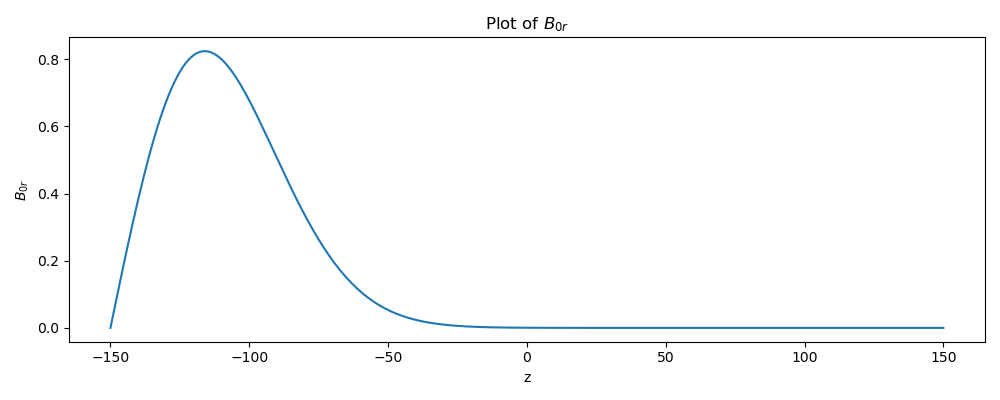

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

# Plot of B0_R
axs.plot(z, B0_R)
axs.set_xlabel('z')
axs.set_ylabel(r'$B_{0r}$')
axs.set_title(r'Plot of $B_{0r}$')

# Plot of B0_PHI
# axs[1].plot(z, B0_PHI)
# axs[1].set_xlabel('z')
# axs[1].set_ylabel(r'B_{0\phi}')
# axs[1].set_title(r'Plot of $B_{0\phi}$')

plt.tight_layout()
plt.show()

Plotting B in 3d

In [9]:
#No of points where vectors have to be shown in R,Phi,z
pl_res=(4,10,20)

# Assuming B_total and pitch_angles are your arrays
B_total,pitch_angles=b_total_pitch(B0_R,B0_PHI) # random pitch angles between 0 and pi/2


B_3d_phi = np.tile(B0_PHI[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_r = np.tile(B0_R[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_z = np.zeros_like(B_3d_r)
B_3d_total= np.tile(B_total, (pl_res[0], pl_res[1], 1))
# Define the grid in r, phi, z
r = np.linspace(0, 1000, B_3d_r.shape[0])
phi = np.linspace(0, 2*np.pi, B_3d_phi.shape[1])
z = np.linspace(0, 300, B_3d_z.shape[2])
r, phi, z = np.meshgrid(r, phi, z, indexing='ij')

# Convert to Cartesian coordinates
x = r * np.cos(phi)
y = r * np.sin(phi)

# Convert B_3d_r, B_3d_phi to Cartesian components
B_3d_x = B_3d_r * np.cos(phi) - B_3d_phi * np.sin(phi)
B_3d_y = B_3d_r * np.sin(phi) + B_3d_phi * np.cos(phi)

# Create 3D plot
# Compute magnitudes for scaling
B_magnitude = np.max(np.sqrt(B_3d_x ** 2 + B_3d_y ** 2 + B_3d_z ** 2))

# Scale components by magnitude for variable lengths
scale_factor = 100  # Adjust this factor for desired length scaling

B_3d_x_scaled = B_3d_x / B_magnitude * scale_factor
B_3d_y_scaled = B_3d_y / B_magnitude * scale_factor
B_3d_z_scaled = B_3d_z / B_magnitude * scale_factor

fig = go.Figure()

# Add an arrow trace for each point
fig = go.Figure(data=go.Cone(x=x.ravel(), y=y.ravel(), z=z.ravel(),
                             u=B_3d_x_scaled.ravel(), v=B_3d_y_scaled.ravel(), w=B_3d_z_scaled.ravel(),
                             sizemode="scaled", sizeref=1))

# Set labels
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'),
    width=fig_s,
    height=fig_s)

fig.show()

Plotting variation of $B_{r}$ with time

301


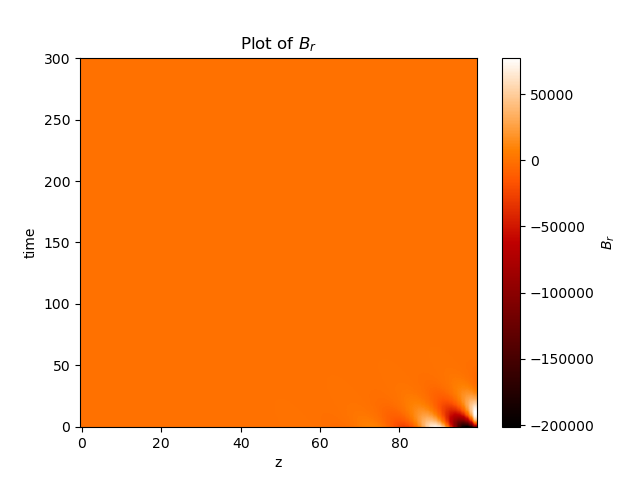

In [10]:
B_R,B_PHI = mod_crank_nicolson(B0_R, dz, dt, t_f,alpha,Omega,q,D)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$B_{r}$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $B_{r}$')
plt.show()


Plotting variation of $B_{\phi}$ with time

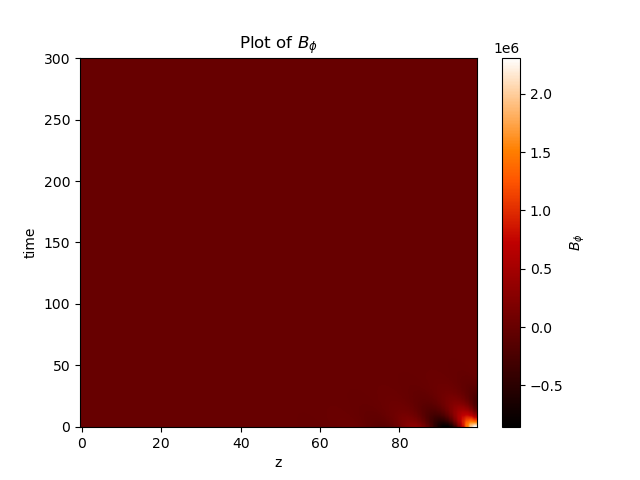

In [11]:
fig1=plt.figure()
plt.imshow(B_PHI, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar(label=r'$B_{\phi}$')
plt.xlabel('z')
plt.ylabel('time')
plt.title(r'Plot of $B_{\phi}$')
plt.show()